# **PHASE 3 CLASSIFICATION PROJECT by Benbellah Owino**

## **1. Business Case**<hr>

Our client, Mouz Bank, want's a model to easen the loan approval process. We will be using the model below to build a model that fulfil's the clients wishes.<br><br>

*About the Data*<br>
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

*Source*<br>
https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

### *Objectives*

## **2. Imports And Data Loading**<hr>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [147]:
df = pd.read_csv("./data/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [148]:
df = df.drop(columns=["loan_id"])

## **3. Data Understanding**<hr>

In [149]:
# Looking at the metadata of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


From the results above we can see that the data has no null values.
I can also identify some categorical columns that need to be one-hot encoded

In [150]:
# Looking at descriptive statistics of the numerical columns
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## **4. Building our BASELINE model(Logistic Regression)**<hr>

In [151]:
# Removing whitespaces from column names
df.columns = df.columns.str.strip()

In [152]:
df["loan_status"].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [153]:
# Convert loan status to boolean where approved == True and rejected == false
df['loan_status'] =  df['loan_status'].str.strip().map({'Approved': True, 'Rejected': False})

In [154]:
# Splitting the data
df_mod = df.copy() 
df_mod['loan_status'] =  df_mod['loan_status']
y = df_mod['loan_status']
X = df_mod.drop(columns=["loan_status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [155]:
print(df.select_dtypes(include='number').columns)

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


In [156]:
df.select_dtypes(include=['object', 'category', 'bool']).columns

Index(['education', 'self_employed', 'loan_status'], dtype='object')

Below we define our continous numerical columns and categorical columns so that we can apply the appropriate preprocessing steps to both types of columns

In [157]:
num_cols = [ 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

In [158]:
cat_cols = ['education', 'self_employed']

### Setting up pipelines

We set up a pipeline to put all our preprocessing steps together and prevent errors 

In [159]:
# Setting up the preprocessing steps for our numerical and categorical columns
# StandardScaling the numerical columns, 
# One Hot encoding the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop="first"), cat_cols)
    ]
)

In [160]:
# Initializing our pipeline and providing our preprocessor and model
log_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("logreg", LogisticRegression())
])

In [161]:
y_train

3404    False
781      True
3002     True
4047    False
3391     True
        ...  
3444    False
466     False
3092    False
3772    False
860      True
Name: loan_status, Length: 2988, dtype: bool

In [162]:
# Fitting our pipeline on the training data and predicting on the testing data
log_pipe.fit(X_train, y_train)
y_pred = log_pipe.predict(X_test)

##### **Model Evaluation**

In [ ]:
# Evaluate
def model_evaluate_pipe(model, X_train,X_test, y_test, y_pred):
    accuracy = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root mean squared error
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Performance Metrics:")
    print(f"R² Score: {r2:.4f}")  # Higher is better; 1.0 indicates perfect prediction
    print(f"Root Mean Squared Error: {rmse:.2f}")  # Lower is better
    print(f"Mean Absolute Error: {mae:.2f}")  # Lower is better
    print("Accuracy:", accuracy )

    print("\n\n ========== Accuracy Scores=========")

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc  = accuracy_score(y_test, model.predict(X_test))

    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)
    

    print("\n\n ========== Error Scores=========")
    train_mae = mean_absolute_error(y_train, model.predict(X_train))
    test_mae  = mean_absolute_error(y_test,model.predict(X_test))

    print("Train MAE:", train_mae)
    print("Test MAE:", test_mae)

    print("\n\n ============================= Report ===========================")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Probabilities for each class if supported
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_test_prob = None
        
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))


In [181]:
model_evaluate_pipe(model=log_pipe, X_train= X_train, X_test=X_test, y_test=y_test, y_pred=y_pred)


Model Performance Metrics:
R² Score: 0.5803
Root Mean Squared Error: 0.31
Mean Absolute Error: 0.10
Accuracy: 0.9024199843871975


 ========== Accuracy Scores=========
Train accuracy: 0.9233601070950469
Test accuracy: 0.9024199843871975


 ========== Error Scores=========
Train MAE: 0.07663989290495314
Test MAE: 0.0975800156128025


 ============================= Report ===========================
              precision    recall  f1-score   support

       False       0.86      0.87      0.87       471
        True       0.92      0.92      0.92       810

    accuracy                           0.90      1281
   macro avg       0.89      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281

ROC-AUC: 0.9634924379439596


[[410  61]
 [ 64 746]]


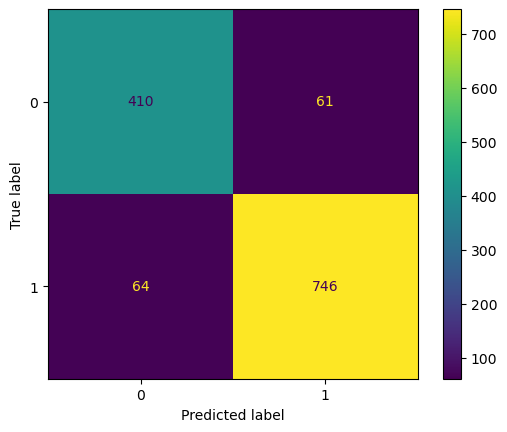

In [165]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

### **Model Results**
* The model has 746 TP, 410 TN, 61 FP and 64 FN. 
* The model's test and training MAE's have a difference of 0.02 so the model generalizes well to new data. The model accuracys are also almost similar. The model is well fitted.
* The model is correct for approval 93% of the time and rejection 87% of the time . This is good accuracy that doesn't significantly negatively affect customer satisfication.
* Recall for approval is 92% so it correctly approves good borrowers most of the time.
* Our ROC-AUC of 0.963 means the model separated the Approved vs Rejected extremely well.

## **5. Additional Models (Decision Tree Classifier)**<hr>

Let's try to build a decision tree classifier and see if it improves our correcteness. We will start by building a Decision Tree with the default hyperparameters and a criterion of 1. I won't be using a pipeline for the next model. I'll do the preprocessing manually.

In [166]:
# Preparing the data
df_tree = df.copy()
yt = df_tree["loan_status"]
Xt = df_tree.drop(columns=["loan_status"])
Xt_train, Xt_test,yt_train, yt_test = train_test_split(Xt, yt,test_size=0.3, random_state=42)

In [167]:
# One hot encoding the variables
ohe = OneHotEncoder()

ohe.fit(Xt_train[cat_cols])
Xt_train_ohe = ohe.transform(Xt_train[cat_cols]).toarray()
ohe_df = pd.DataFrame(Xt_train_ohe, columns=ohe.get_feature_names_out(cat_cols), index=Xt_train.index)

Xt_final = pd.concat(
    [Xt_train[num_cols], ohe_df],
    axis = 1
)
Xt_final.head()


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
3404,4,2800000,8300000,14,381,3200000,1100000,9100000,1500000,0.0,1.0,1.0,0.0
781,3,9900000,20400000,4,865,26300000,3600000,36500000,12800000,0.0,1.0,0.0,1.0
3002,4,3500000,10700000,8,883,200000,2300000,8400000,2000000,1.0,0.0,0.0,1.0
4047,3,6400000,23000000,8,520,12100000,11400000,16000000,3800000,0.0,1.0,1.0,0.0
3391,2,3300000,6700000,8,845,1300000,4600000,12300000,3200000,1.0,0.0,0.0,1.0


In [168]:
# Fitting the model
dtm1 = DecisionTreeClassifier(criterion="entropy")
dtm1.fit(Xt_final, yt_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


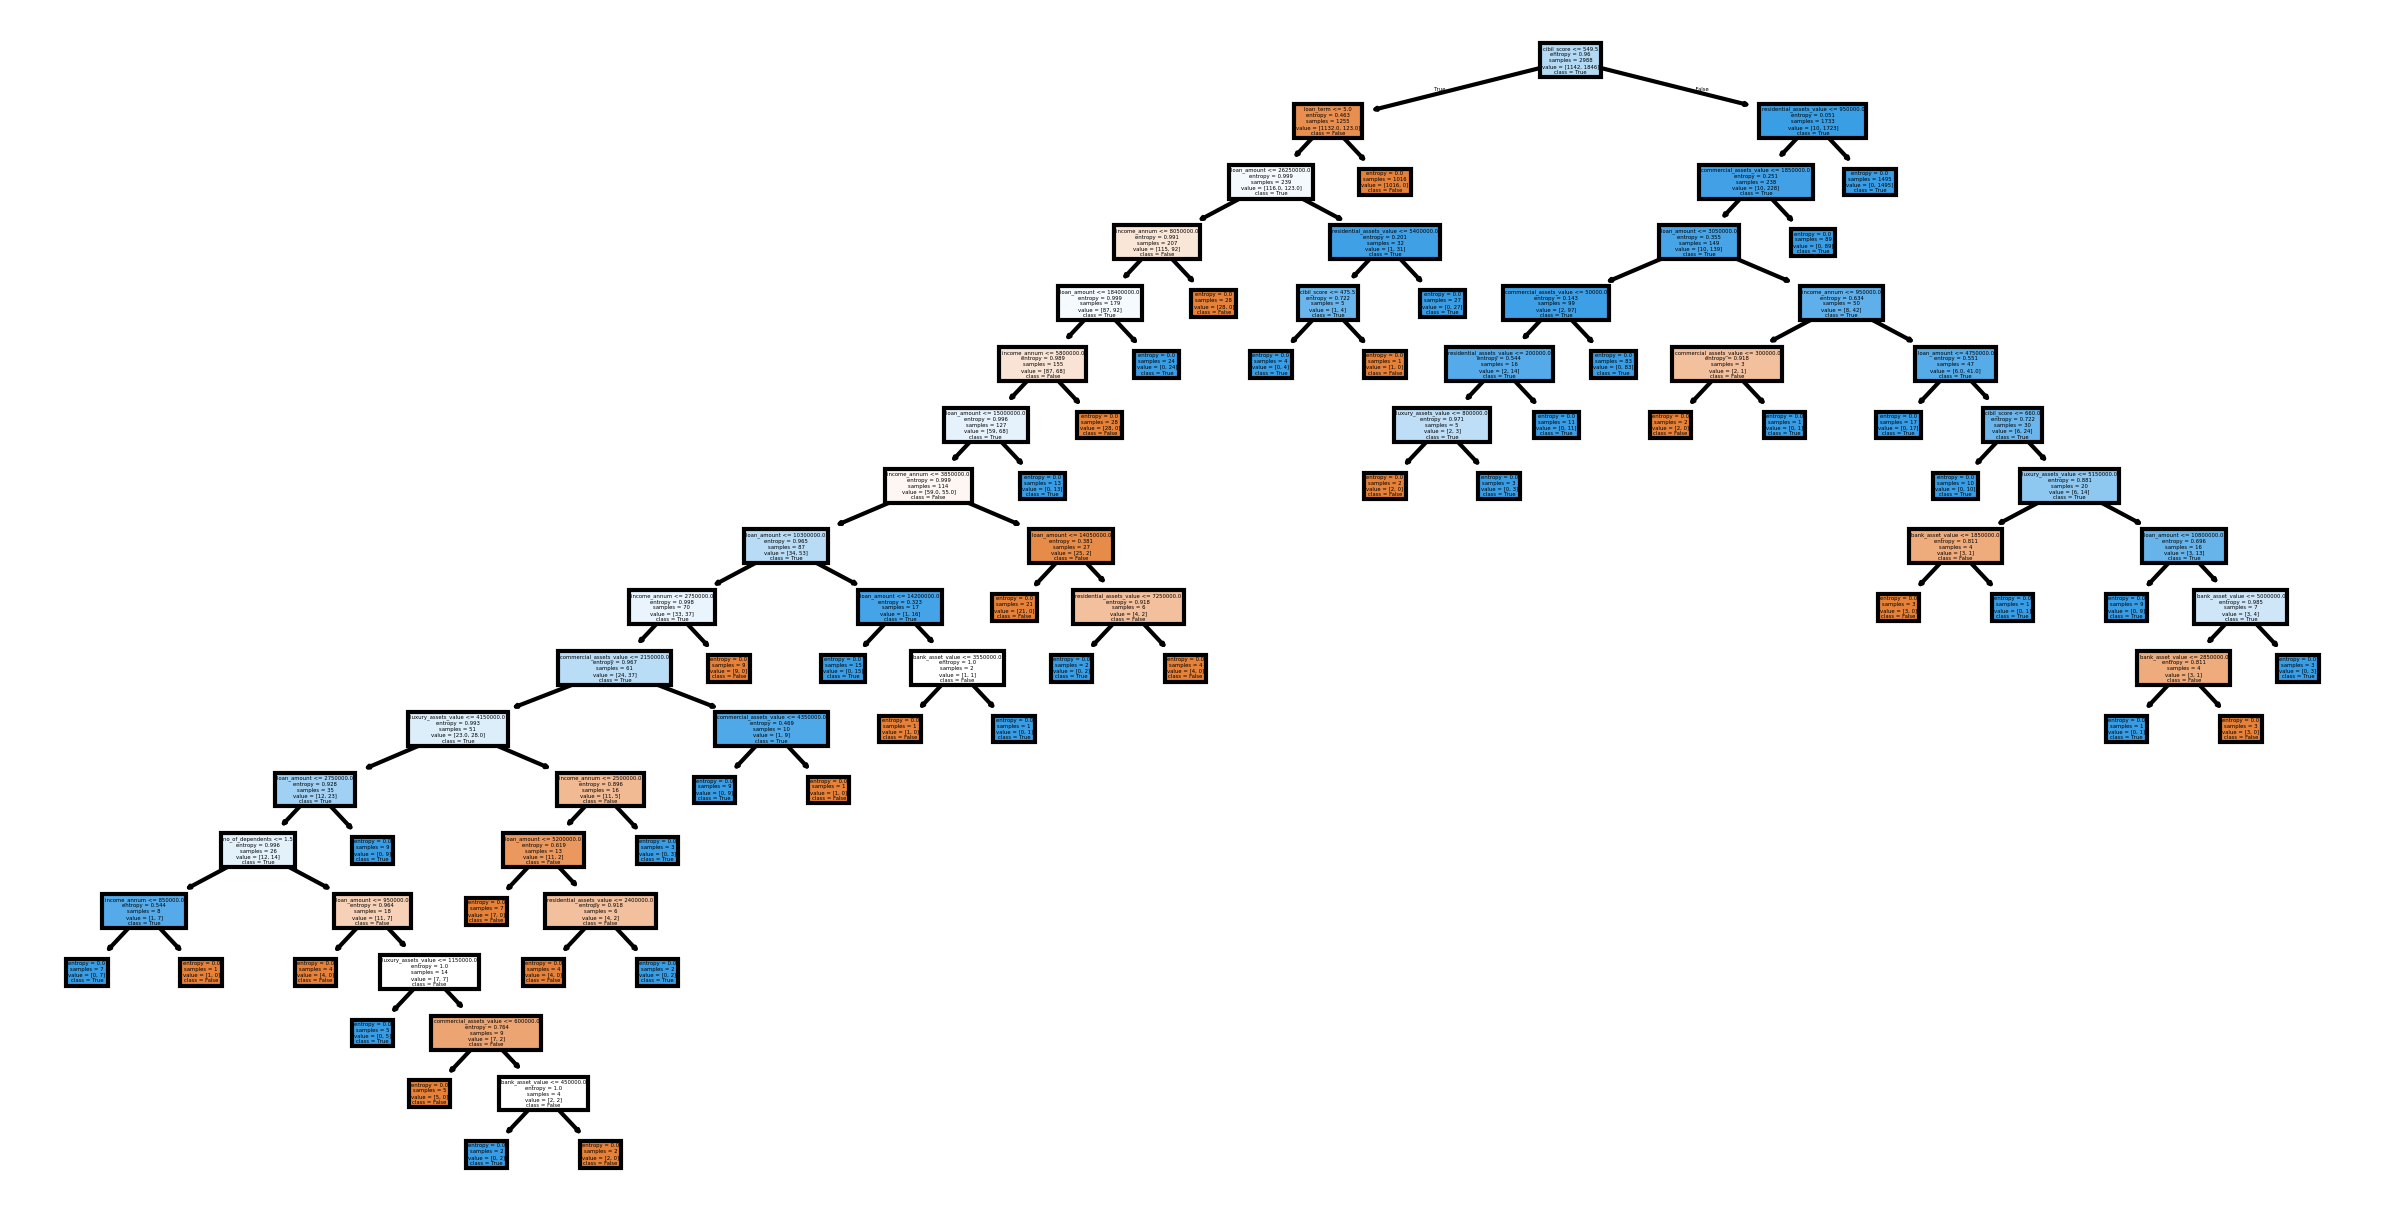

In [169]:
# Plot the decision tree
fig, axes = plt.subplots(nrows = 1, ncols=1, figsize = (10, 5), dpi=300)
tree.plot_tree(dtm1,
               feature_names = Xt_final.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

The plot is complex and hard to read, but we have an idea of what the model looks like and its reasoning.

##### **Model Evaluation**

In [170]:
Xt_test_ohe = ohe.transform(Xt_test[cat_cols]).toarray()
ohe_ttest = pd.DataFrame(
    Xt_test_ohe,
    columns = ohe.get_feature_names_out(cat_cols),
    index = Xt_test.index
) 

Xt_test_final = pd.concat(
    [Xt_test[num_cols], ohe_ttest],
    axis = 1
)

yt_preds = dtm1.predict(Xt_test_final)

print('Accuracy: ', accuracy_score(yt_test, yt_preds))

Accuracy:  0.9773614363778298


In [171]:
Xt_test_final

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
1703,5,5400000,19700000,20,423,6500000,10000000,15700000,7300000,1.0,0.0,1.0,0.0
1173,2,5900000,14000000,8,599,4700000,9500000,17800000,6700000,1.0,0.0,1.0,0.0
308,3,9600000,19900000,14,452,4200000,16200000,28500000,6600000,1.0,0.0,1.0,0.0
1322,2,6200000,23400000,8,605,10000000,10800000,21800000,9200000,1.0,0.0,1.0,0.0
3271,3,5800000,14100000,12,738,11700000,4400000,15400000,8400000,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,0,2100000,5900000,14,402,4400000,0,4800000,1000000,0.0,1.0,1.0,0.0
3415,3,500000,2000000,12,890,800000,700000,1800000,400000,1.0,0.0,1.0,0.0
3291,5,8400000,31900000,10,605,18900000,10300000,22000000,9100000,0.0,1.0,0.0,1.0
2016,4,5800000,14200000,20,535,10200000,4000000,21100000,3400000,0.0,1.0,1.0,0.0


In [182]:
# Create a model evaluation function for non-pipeline models
# Evaluate
def model_evaluate_man(model,X_train,X_test, y_test, y_pred):
    # Predictions
    y_train_pred = model.predict(X_train)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Performance Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Accuracy: {accuracy:.4f}")

    print("\n========== Accuracy Scores ==========")
    print("Train accuracy:", accuracy_score(y_train, y_train_pred))
    print("Test accuracy :", accuracy)

    print("\n========== Error Scores ==========")
    print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
    print("Test MAE :", mae)

    print("\n============================= Report ===========================")
    print(classification_report(y_test, y_pred))

    # Probabilities for each class if supported
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_test_prob = None

    if y_test_prob is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))


In [183]:
model_evaluate_man(model = dtm1,X_train = Xt_final,X_test=Xt_test_final, y_test=yt_test, y_pred=yt_preds)


Model Performance Metrics:
R² Score: 0.9026
Root Mean Squared Error: 0.15
Mean Absolute Error: 0.02
Accuracy: 0.9774

========== Accuracy Scores ==========
Train accuracy: 1.0
Test accuracy : 0.9773614363778298

========== Error Scores ==========
Train MAE: 0.0
Test MAE : 0.02263856362217018

============================= Report ===========================
              precision    recall  f1-score   support

       False       0.98      0.96      0.97       471
        True       0.98      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281

ROC-AUC: 0.9736573091137847


We see an overall increase in the perfomanc metrics. Let's look at the confusion matrix for this model.

[[452  19]
 [ 10 800]]


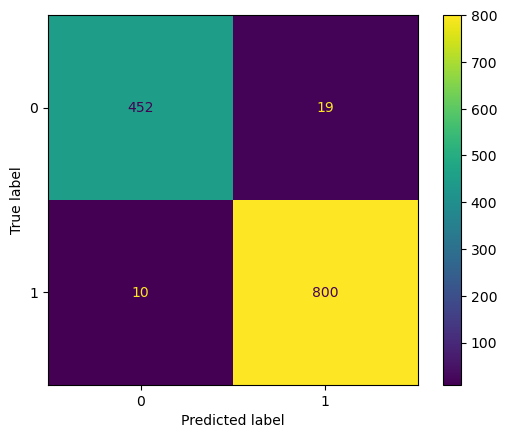

In [186]:
cmt = confusion_matrix(yt_test, yt_preds)
print(cmt)

ConfusionMatrixDisplay(confusion_matrix=cmt).plot()


### **Model Results**
* The model has 800 TP, 452 TN, 19 FP and 10 FN. 
* The model's test and training MAE's have a difference of 0.02 so the model generalizes well to new data. The model is really accurate to the training data to the point it seems overfitted but it also generalizes well to unseen data, hence their is a negligebal difference in both accuracy and test scores.
* The model is correct for approval 98% of the time and rejection 98% of the time . This is good accuracy that doesn't significantly negatively affect customer satisfication.
* Recall for approval is 92% so it correctly approves good borrowers most of the time.
* Our ROC-AUC of 0.974 means the model separated the Approved vs Rejected extremely well.

## **Final Models**<hr>